In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def GenerateRandomUniform(N: int, theta: float):
    array = np.random.uniform(theta, 2 * theta, N)
    array.sort()
    return array

In [41]:
N = 100
theta = 2
generated = GenerateRandomUniform(N, theta)
print("Сгенерированная выборка = ", generated)

Сгенерированная выборка =  [2.02785926 2.0747195  2.08888995 2.17043031 2.17845078 2.19951243
 2.22422716 2.22537142 2.22545715 2.23237675 2.23596394 2.27472474
 2.27636313 2.27921655 2.29041555 2.30157953 2.35716186 2.36119565
 2.36936678 2.37360856 2.3853467  2.4135785  2.41582623 2.41749375
 2.4460744  2.45633377 2.47202676 2.48317686 2.50146499 2.50201332
 2.53769789 2.56184117 2.56538416 2.58852336 2.59543266 2.59719306
 2.61532142 2.6270011  2.67717604 2.67968044 2.74346835 2.7836777
 2.81455964 2.83287987 2.85600608 2.88501416 2.89852508 2.90503508
 2.92618198 2.93937728 2.94528632 2.96140689 2.97217993 2.99527208
 3.01121585 3.03023794 3.06367607 3.06956241 3.08144175 3.09880122
 3.12605781 3.13266822 3.17086379 3.17786555 3.19181153 3.19998418
 3.21658698 3.21945394 3.22493081 3.25254962 3.25538761 3.25949077
 3.27345101 3.30008318 3.31446065 3.35730138 3.38542395 3.4043366
 3.44704197 3.50210145 3.52584518 3.5319587  3.56229277 3.58677175
 3.63301891 3.63398104 3.67556674 3.7

## Точный доверительный интервал 

In [42]:
def ConfidenceIntervalАccurateTheta(x):
    x_avg = np.mean(x)
    n = len(x)
    left = x_avg * 12 ** 0.5 / (27 ** 0.5 + 1.96 / n ** 0.5)
    right = x_avg * 12 ** 0.5 / (27 ** 0.5 - 1.96 / n ** 0.5)
    return (left, right)

In [43]:
a, b = ConfidenceIntervalАccurateTheta(generated)
print(a, b)
print("Точный доверительный интервал. Длина =", b - a)

1.891114977151148 2.0393738717553984
Точный доверительный интервал. Длина = 0.14825889460425046


## Асимптотический доверительный интервал. ОММ

In [53]:
def ConfidenceIntervalAsymptoticThetaOMM(x):
    x_avg = np.mean(x)
    g_alpha = 2 / 3 * x_avg  
    n = len(x)
    alpha_1 = x_avg
    alpha_2 = np.mean(x * x)
    same_part =  1.96 * 2 * np.sqrt(alpha_2 - alpha_1 ** 2) / n ** 0.5 / 3
    left = - same_part + g_alpha
    right = same_part + g_alpha
    return (left, right)

In [54]:
a, b = ConfidenceIntervalAsymptoticThetaOMM(generated)
print(a, b)
print("Асимптотический ОММ. Длина =", b - a)

1.8916285861812134 2.0332679049616442
Асимптотический ОММ. Длина = 0.1416393187804308


## Bootstrap

In [55]:
def BootstrapGenerate(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

In [56]:
def UniformGenerate(x, N):
    theta = max(x) / 2
    return [GenerateRandomUniform(len(x), theta) for _ in range(N)]

def BootstrapParametricTheta(x):
    N = 50000
    generated_with_model = UniformGenerate(x, N)
    theta_stars = []
    for current_sample in generated_with_model:
        theta_stars.append(np.mean(current_sample) * 2 / 3)
    theta_stars = np.sort(theta_stars)
    k1 = int((1 - 0.95) * N / 2) - 1
    k2 = int((1 + 0.95) * N / 2) - 1 
    return theta_stars[k1], theta_stars[k2]

In [65]:
a, b = BootstrapParametricTheta(generated)
print(a, b)
print("Параметрический bootstrap. Оценка - ОММ. Длина =", b - a)

1.8956892664332872 2.0453669876304894
Параметрический bootstrap. Оценка - ОММ. Длина = 0.14967772119720224


In [81]:
def BootstrapNonParametricTheta(sample):
    bootstrap_generated = BootstrapGenerate(sample, 1000)
    theta_star = 2 / 3  * np.mean(sample)
    delts = []
    for current_sample in bootstrap_generated:
        delts.append(2 / 3 * np.mean(current_sample) - theta_star)
    delts.sort()
    return (-delts[974] + theta_star , -delts[24] + theta_star)

In [82]:
a, b = BootstrapNonParametricTheta(generated)
print(a, b)
print("Непараметрический bootstrap. Оценка - ОММ. Длина =", b - a)

1.8970295666490893 2.0365506992835485
Непараметрический bootstrap. Оценка - ОММ. Длина = 0.1395211326344592


## Сравнение доверительных интервалов

In [83]:
def Compare(sample, func_list, names_list):
    h = 0
    for f in func_list:
        left, right = f(sample)
        x = np.linspace(left, right, len(sample))
        y = [h] * len(x)
        plt.plot(x, y)
        h -= 0.1 
    plt.legend(names_list)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)

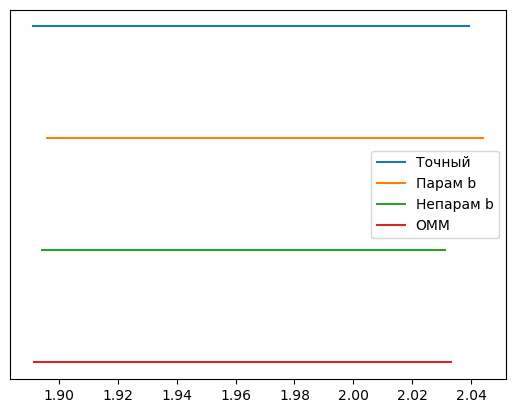

In [84]:
func_list = [ConfidenceIntervalАccurateTheta, BootstrapParametricTheta, BootstrapNonParametricTheta, ConfidenceIntervalAsymptoticThetaOMM]
names_list = ['Точный', 'Парам b', 'Непарам b', 'ОММ']
Compare(generated, func_list, names_list)